In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy
import scipy.optimize as opt 
%matplotlib inline

In [7]:
rxd=13
rxu=2000
u0=5
uxd=3.2
uxu=3.4 
def f(x,y):
    rr = uxu*(rxu*(x+y)+x*y)/(rxu*y)-uxd*(rxd*(x+y)+x*y)/(rxd*y)
    rm = (uxu-uxd)*(rxu-rxd)*(x+y)+(uxu-uxd)*x*y+u0*(rxu-rxd)*y 
    return np.abs(rr)
def h(x,y):
    return f(y,x)
xmin = scipy.optimize.minimize(f,2.0,1.0).x[0]
ymin = scipy.optimize.minimize(h,3.0,xmin).x[0]
 
print xmin, ymin
scipy.optimize.minimize(h,3.0,xmin)

2.0 3.0


      fun: array([ 0.15557436])
 hess_inv: array([[1]])
      jac: array([ 0.04444444])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 129
      nit: 0
     njev: 41
   status: 2
  success: False
        x: array([ 3.])

In [3]:
opt.differential_evolution(f,[(0,3000)], 2.00)

NameError: name 'opt' is not defined

In [274]:
rxd=15
rxu=3000
u0=5
uxd=3.0
uxu=3.5
alu=0.68
ald=0.59

def r1(r2,rx,al):
    return -(al*rx*r2)/(rx*(al-1)+al*r2)
def dif(r2):
    return abs(r1(r2,rxu,alu) - r1(r2,rxd,ald))
r2=0
while (r2<0.1):
    r2 = opt.differential_evolution(dif,[(0.,3000.)]).x[0]
    
r11= r1(r2,rxu,alu)
print "R1 =",round(r11,3),"R2 =",round(r2,3),"||",opt.differential_evolution(dif,[(0.,3000.)]).fun,  round(r11/r2,3)
print "I_max =", round(5000.*ald/rxd,2),"mA ", "I_min =" , round(5000.*alu/rxu,2), "mA"
print "U_max =", round(5*alu,3),"V    ","U_min =",round(5*ald,3),"V"

R1 = 7.204 R2 = 3.382 || 8.58304235559e-08 2.13
I_max = 196.67 mA  I_min = 1.13 mA
U_max = 3.4 V     U_min = 2.95 V


39.3825373418 -33.0879373298


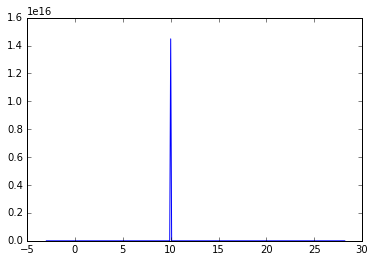

In [253]:
print r1(r2,rxu,alu), r1(r2,rxd,ald)
x=np.arange(-3,r2+10,0.1)
y=dif(x)
plt.plot(x,y)

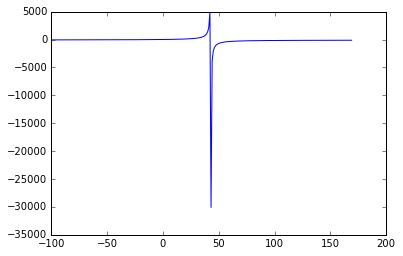

In [211]:
x=np.arange(-100,170,1)
y=r1(x,rxu,alu)
plt.plot(x,y)

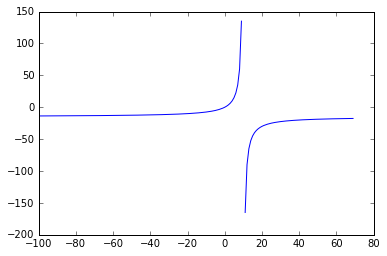

In [200]:
x=np.arange(-100,70,1)
y=r1(x,rxd,ald)
plt.plot(x,y)

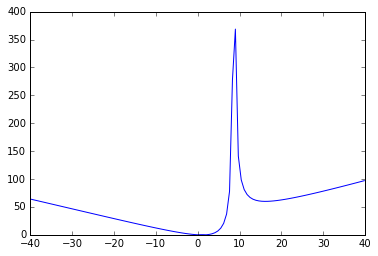

In [79]:
x=np.arange(-40,40,0.7)
y=dif(x)
plt.plot(x,y)

In [278]:
def f(x,y):
    return x*y/(x+y)
f(10.,30.)

7.5